In [1]:
%pylab inline
from mpl_toolkits.mplot3d import axes3d

Populating the interactive namespace from numpy and matplotlib


In [2]:
x = linspace(-10, 10, 100)
y = linspace(-10, 10, 100)

X, Y = meshgrid(x, y)

Para $z=f(x,y)=x+iy$
$$
\begin{array}{rl}
\cos(x+iy)&=\dfrac{e^{i(x+iy)}+e^{-i(x+iy)}}{2}\\
&=\dfrac{e^{ix}+e^{-ix}e^{2y}}{2e^y}\\
&=\cos x\left(\dfrac{1+e^{2y}}{2e^y}\right)+i\sin x\left(\dfrac{1-e^{2y}}{2e^y}\right)\\
\text{Re}(\cos (x+iy)) & = \cos x\left(\dfrac{1+e^{2y}}{2e^y}\right)
\end{array}
$$

Para $y=0$
$$
\text{Re}(\cos (x)) = \cos x\left(\dfrac{1+1}{2}\right)=\cos x
$$

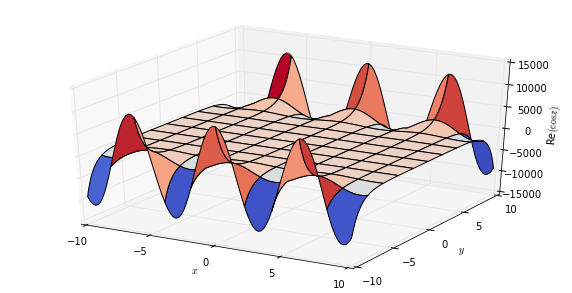

In [3]:
def recos(x,y):
    return cos(x)*(1+e**(2*y))/(2*e**y)

Z = recos(X, Y)

fig = figure(figsize = (10,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("Re$(\cos z)$")
plt.show()

Para $z=f(x,y)=x+iy$
$$
\begin{array}{rl}
\sin(x+iy)&=\dfrac{e^{i(x+iy)}-e^{-i(x+iy)}}{2i}\\
&=\dfrac{e^{ix}-e^{-ix}e^{2y}}{2ie^y}\\
&=\cos x\left(\dfrac{1-e^{2y}}{2ie^y}\right)+i\sin x\left(\dfrac{1+e^{2y}}{2ie^y}\right)\\
\text{Im}(\sin (x+iy)) & = \cos x\left(\dfrac{e^{2y}-1}{2e^y}\right)
\end{array}
$$

Para $y=0$
$$
\text{Im}(\sin (x)) = \cos x\left(\dfrac{1-1}{2}\right)=0
$$

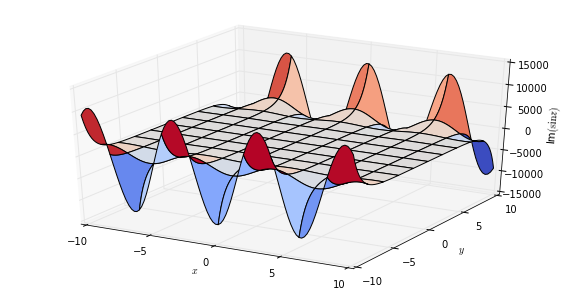

In [4]:
def imsin(x, y):
    return cos(x)*(e**(2*y)-1)/(2*e**y)

Z = imsin(X, Y)

fig = figure(figsize = (10,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("Im$(\sin z)$")
plt.show()

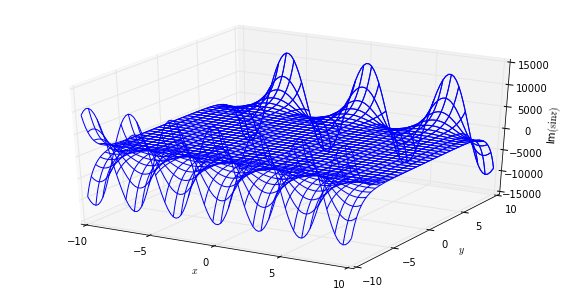

In [5]:
fig = figure(figsize = (10,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, recos(X,Y), rstride=3, cstride=3)
ax.plot_wireframe(X, Y, imsin(X,Y), rstride=3, cstride=3)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("Im$(\sin z)$")
plt.show()

In [6]:
import sympy as spy
import numpy as np
from IPython.display import display
spy.init_printing()

# 1
Calcule explicitamente la integral $\oint\limits_C dz/z$. El camino $C$ va a lo largo del triangulo con vertices en $1+i$, $2+i$ y $2+2i$, en la direccion contraria a las manecillas del reloj. 

Initial expression with limits (x, 2, 1)


Solution


Initial expression with limits (x, 1, 2)


Solution


Initial expression with limits (x, 1, 2)


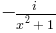

Solution


Initial expression with limits (y, 1, 2)


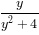

Solution


Initial expression with limits (y, 1, 2)


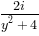

Solution


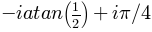

Result


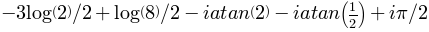

Simplified


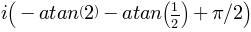

In [16]:
x = spy.Symbol('x')
x1 = 2
x2 = 1
y = spy.Symbol('y')
y1 = 2
y2 = 1

first_exp = 1/x
second_exp = x/(x**2+1)
second_exp2 = - spy.I/(x**2+1)
third_exp = y/(4+y**2)
third_exp2 = spy.I*2/(4+y**2)

expressions = [first_exp, second_exp, second_exp2, third_exp, third_exp2]
limits = [(x, x1, x2), (x, x2, x1), (x, x2, x1), (y, y2, y1), (y, y2, y1)]

results = []

for (initial, limit) in zip(expressions, limits):
    temp = spy.integrate(initial, limit)
    print("Initial expression with limits", limit)
    display(initial)
    print("Solution")
    display(temp.expand())
    results.append(temp)
    print("===================================")
    
print("Result")
result = sum(results)
display(result)
result = spy.simplify(result)
print("===================================")
print("Simplified")
display(result)

# 2
Obtenga explicitamente $\oint\limits_C\ln zdz$ sobre la trayectoria constituida por dos semicirculos de radios $r_1$ y $r_2>r1$, con centro en el origen de coordenadas. La trayectoria se completa con los dos ejes radiales real e imaginario, positivos.

In [15]:
r = spy.Symbol('r')
theta = spy.Symbol('\\theta')
r1 = spy.Symbol('r1')
r2 = spy.Symbol('r2')
theta1 = 0
theta2 = spy.pi/2

first_exp = spy.log(r)
second_exp = spy.I*r2*spy.log(r2)*spy.exp(spy.I*theta)+spy.I*r2*(spy.I*theta*spy.exp(spy.I*theta))
third_exp = spy.exp(spy.I*theta2)*spy.log(r) + spy.I*theta2*spy.exp(spy.I*theta2)
fourth_exp = spy.I*r1*spy.log(r1)*spy.exp(spy.I*theta)+spy.I*r1*spy.I*theta*spy.exp(spy.I*theta)

expressions = [first_exp, second_exp, third_exp, fourth_exp]
limits = [(r, r1, r2), (theta, theta1, theta2), (r, r2, r1), (theta, theta2, theta1)]

results = []

for (initial, limit) in zip(expressions, limits):
    temp = spy.integrate(initial, limit)
    print("Initial expression with limits", limit)
    display(initial)
    print("Solution")
    display(temp.expand())
    results.append(temp)
    print("===================================")

print("Result")
result = sum(results)
display(result)
result = spy.simplify(result)
print("===================================")
print("Simplified")
display(result.expand())

Initial expression with limits (r, r1, r2)


Solution


Initial expression with limits (\theta, 0, pi/2)


Solution


Initial expression with limits (r, r2, r1)


Solution


Initial expression with limits (\theta, pi/2, 0)


Solution


Result


Simplified
